# **Name: Nader Mohamed Elhadedy**

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.arange(0,20+1)
Y = -1 * X + 2

#### Plot your data points. 

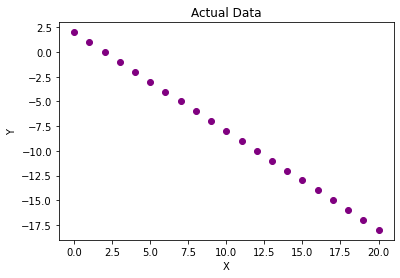

In [3]:
plt.scatter(X,Y, color='purple')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Actual Data")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

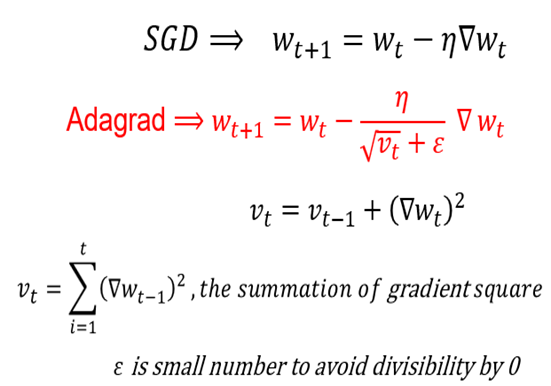

> **Implementing Algorithm**

In [4]:
def Adagrad(X, Y, alpha, epsilon, itrs):

    # handling inputs
    L = alpha
    eps = epsilon
    
    # initializing variables
    theta_0 = 0
    theta_1 = 0
    vt_0, vt_1 = 0,0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []
    
    for i in range(itrs):
        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)
        
        vt_0 = vt_0 + theta0_grd**2
        vt_1 = vt_1 + theta1_grd**2
        
        theta_0 = theta_0 - (L/(np.sqrt(vt_0)+eps)) * theta0_grd
        theta_1 = theta_1 - (L/(np.sqrt(vt_1)+eps)) * theta1_grd
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)
        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)
    
    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

In [22]:
# helping functions

def R2_score(actudal_y_data, final_predicted_y_data):
    SStot = np.sum((actudal_y_data - np.mean(actudal_y_data))**2)
    SSres = np.sum((actudal_y_data - final_predicted_y_data)**2)
    R2 = 1 - (SSres / SStot)
    
    return R2

def plot_loss_curve(listOfLosses):
    plt.plot(list(range(len(listOfLosses))), listOfLosses, '-o', color='purple')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.title("Loss Curve")
    plt.show()
    
def plot_theta_vs_loss(loss_list, theta_list):
    plt.plot(theta_list, loss_list, '-o', color='purple')
    plt.xlabel("Theta")
    plt.ylabel("Loss")
    plt.grid()
    plt.title("Loss vs Theta")
    plt.show()
    
def plot_all_regressions(x_data, y_data, hypothesis_outputs):
    plt.scatter(x_data, y_data, color="purple", label="Actual Data")
    plt.legend()
    plt.grid()
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    for H in hypothesis_outputs:
        plt.plot(x_data, H, 'r')
    plt.show()
    
def plot_best_regression(x_data, y_data, hypothesis_outputs):
    plt.scatter(x_data, y_data, color="purple", label="Actual Data")
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.plot(x_data, hypothesis_outputs[-1], 'r', label="Regression Line")
    plt.legend()
    plt.show()

> **Implementing requirements**

In [23]:
trial = Adagrad(X, Y, 0.09, 10**-8, 100)

In [24]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.5731493025278253 -0.7961238780170742


In [25]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9506462371689236

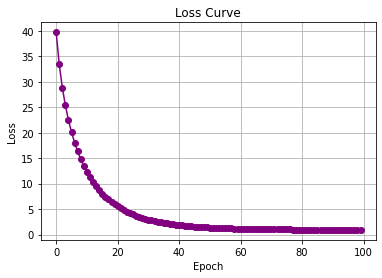

In [26]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


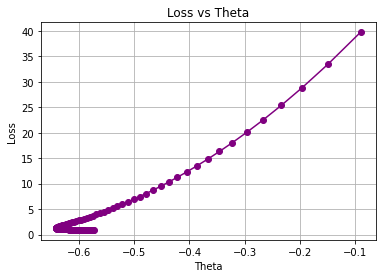


********************** For Theta_1 **********************


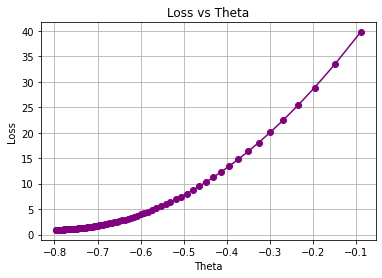

In [27]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

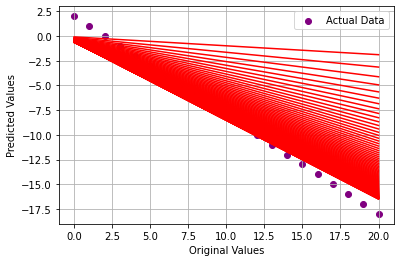

In [28]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

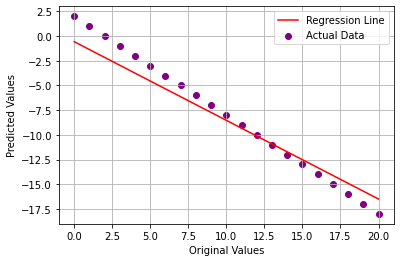

In [29]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

# **Changing hyperparameters**

In [69]:
# alpha to 0.009, itrs to 4000
trial = Adagrad(X, Y, 0.009, 10**-8, 4000)

In [70]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.6425115949783496 -0.7306827715563741


In [71]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9273982348600888

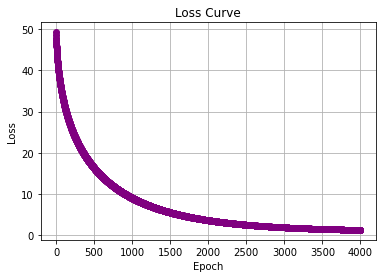

In [72]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


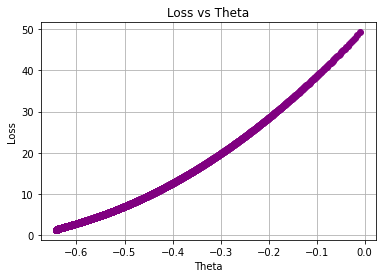


********************** For Theta_1 **********************


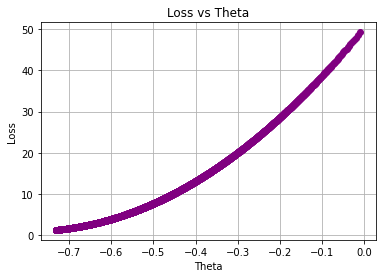

In [73]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

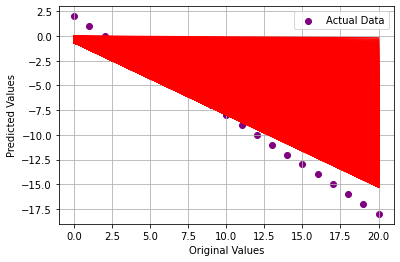

In [74]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

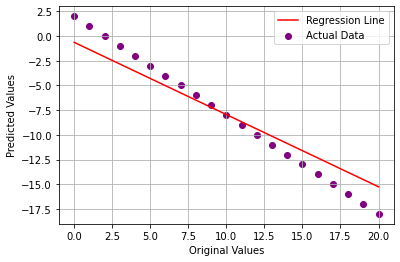

In [75]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [85]:
# alpha to 0.1, itrs to 50
trial = Adagrad(X, Y, 0.1, 10**-8, 50)

In [86]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.640178491198008 -0.7508363266037426


In [87]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9373157005785215

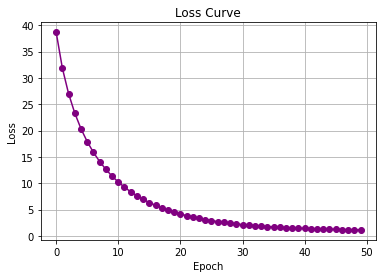

In [88]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


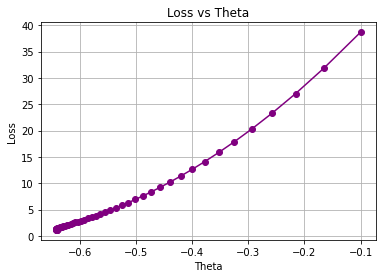


********************** For Theta_1 **********************


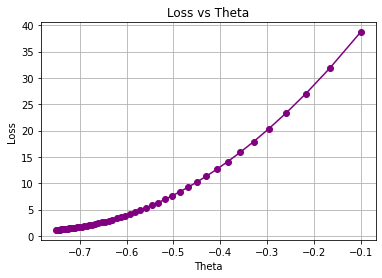

In [89]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

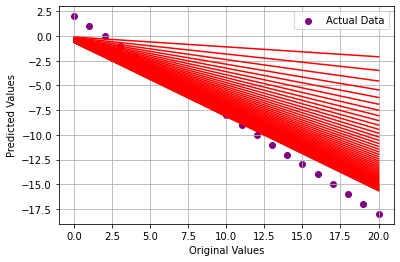

In [90]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

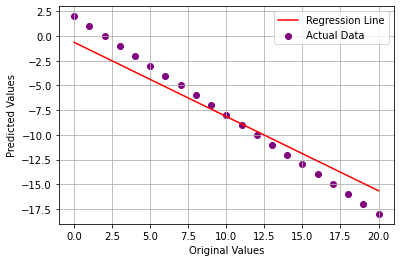

In [91]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

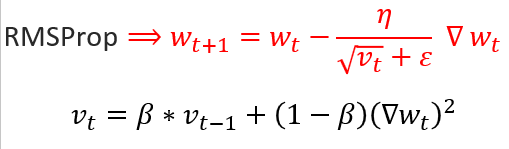

> **Implementing Algorithm**

In [93]:
def RMSProb(X, Y, alpha, epsilon, beta, itrs):

    # handling inputs
    L = alpha
    eps = epsilon
    
    # initializing variables
    theta_0 = 0
    theta_1 = 0
    vt_0, vt_1 = 0,0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []
    
    for i in range(itrs):
        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)
        
        vt_0 = beta * vt_0 + (1-beta) * theta0_grd**2
        vt_1 = beta * vt_1 + (1-beta) * theta1_grd**2
        
        theta_0 = theta_0 - (L/(np.sqrt(vt_0)+eps)) * theta0_grd
        theta_1 = theta_1 - (L/(np.sqrt(vt_1)+eps)) * theta1_grd
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)
        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)
    
    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

> **Implementing requirements**

In [104]:
trial = RMSProb(X, Y, 0.09, 10**-8, 0.9, 40)

In [105]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

0.6678741213024876 -0.9005347321106132


In [106]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9870006197404458

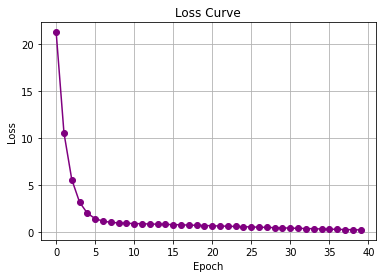

In [107]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


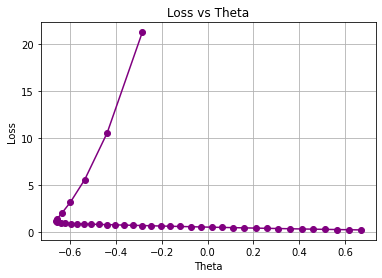


********************** For Theta_1 **********************


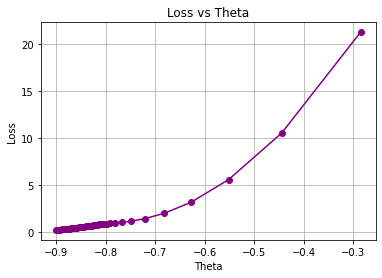

In [108]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

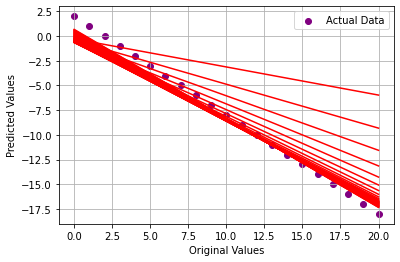

In [109]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

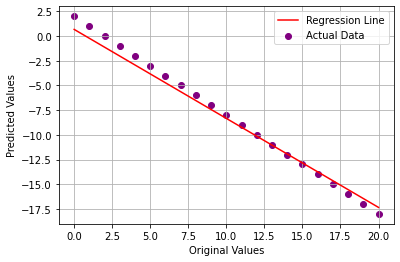

In [110]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

# **Changing hyperparameters**

In [130]:
# alpha to 0.009, itrs to 90, beta to 0.85
trial = RMSProb(X, Y, 0.009, 10**-8, 0.85, 90)

In [131]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.6775008641975475 -0.7426183467881623


In [132]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9334614907521585

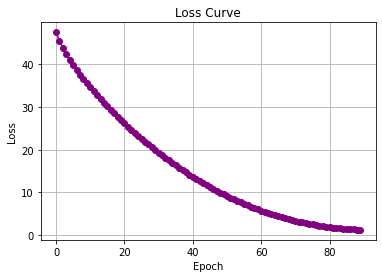

In [133]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


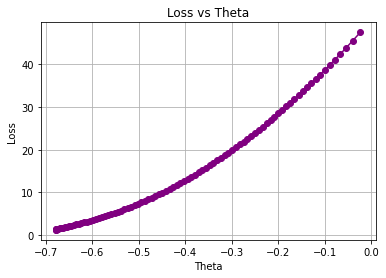


********************** For Theta_1 **********************


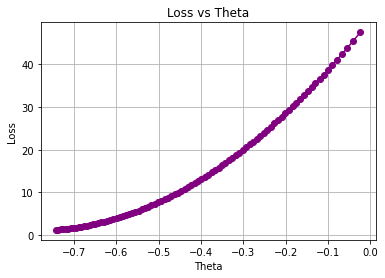

In [134]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

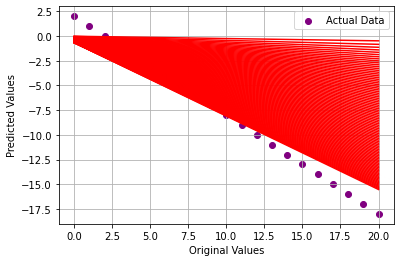

In [135]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

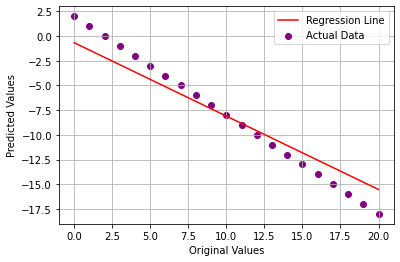

In [136]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [150]:
# alpha to 0.1, itrs to 10, beta to 0.95
trial = RMSProb(X, Y, 0.1, 10**-8, 0.95, 10)

In [151]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.48148446218413343 -0.8132239460927703


In [152]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.9548422405832132

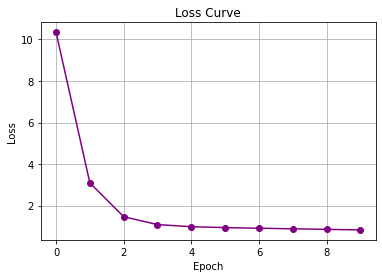

In [153]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


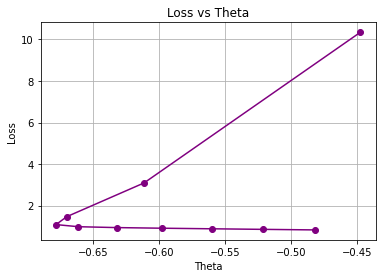


********************** For Theta_1 **********************


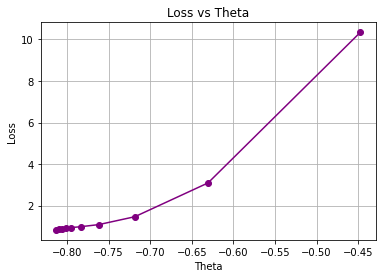

In [154]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

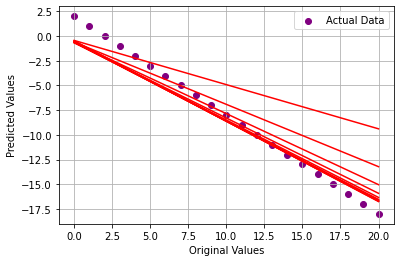

In [155]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

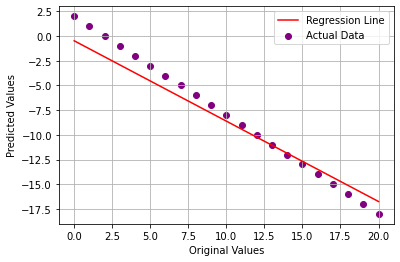

In [156]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [179]:
# alpha to 0.001, itrs to 800, beta to 0.75
trial = RMSProb(X, Y, 0.001, 10**-8, 0.75, 800)

In [180]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.6465401887175369 -0.7907860803985042


In [181]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.947846977825626

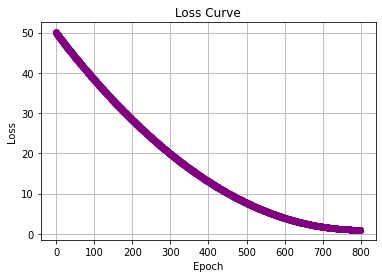

In [182]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


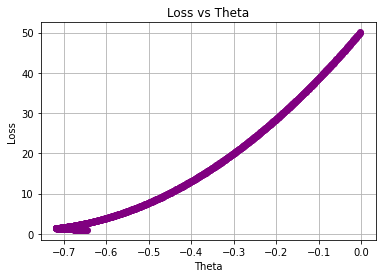


********************** For Theta_1 **********************


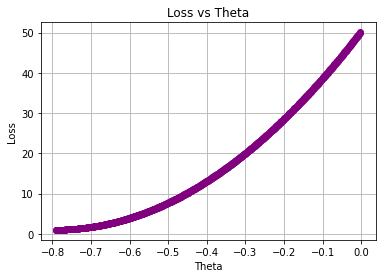

In [183]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

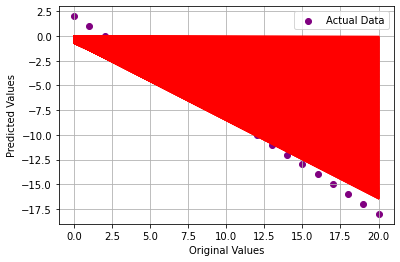

In [184]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

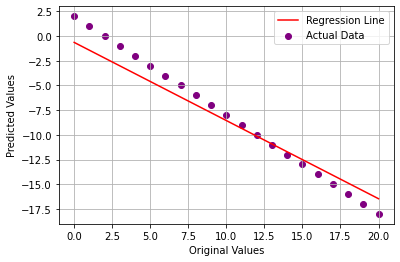

In [185]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

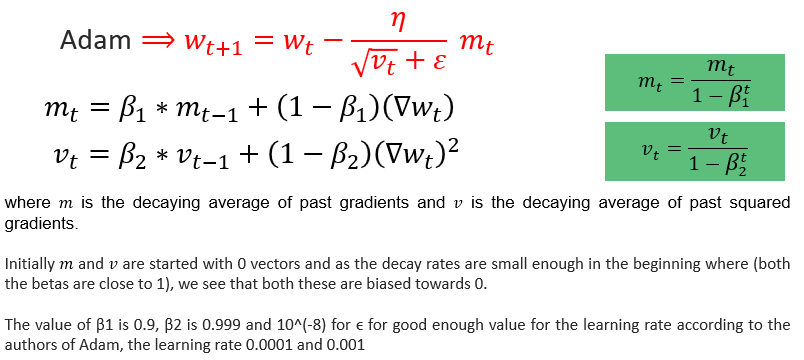

> **Implementing Algorithm**

In [186]:
def Adam(X, Y, alpha, epsilon, beta1, beta2, itrs):

    # handling inputs
    L = alpha
    eps = epsilon
    
    # initializing variables
    theta_0 = 0
    theta_1 = 0
    vt_0, vt_1 = 0,0
    mt_0, mt_1 = 0,0
    t = 0 # time step
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []
    
    for i in range(itrs):
        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)
        
        mt_0 = beta1 * mt_0 + (1-beta1) * theta0_grd
        mt_1 = beta1 * mt_1 + (1-beta1) * theta1_grd
        
        vt_0 = beta2 * vt_0 + (1-beta2) * theta0_grd**2
        vt_1 = beta2 * vt_1 + (1-beta2) * theta1_grd**2
        
        t += 1
        
        mt_0t = mt_0 / (1-beta1**t)
        mt_1t = mt_1 / (1-beta1**t)
        
        vt_0t = vt_0 / (1-beta2**t)
        vt_1t = vt_1 / (1-beta2**t)
        
        theta_0 = theta_0 - (L/(np.sqrt(vt_0t)+eps)) * mt_0t
        theta_1 = theta_1 - (L/(np.sqrt(vt_1t)+eps)) * mt_1t
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)
        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)
    
    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

> **Implementing requirements**

In [202]:
trial = Adam(X, Y, 0.09, 10**-8, 0.9, 0.999, 40)

In [203]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.20679731045837546 -0.7624413204123761


In [204]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.942788876742013

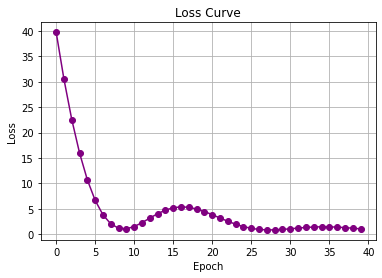

In [205]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


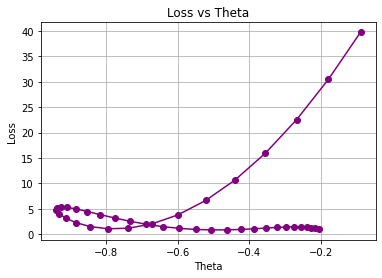


********************** For Theta_1 **********************


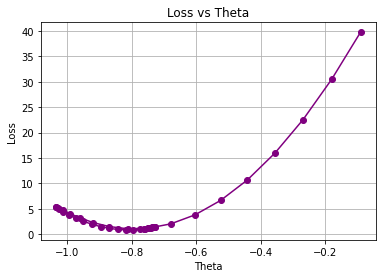

In [206]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

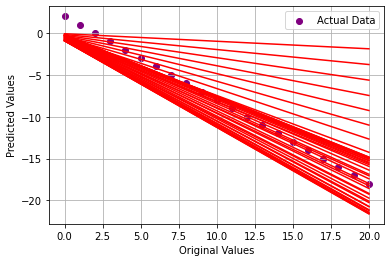

In [207]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

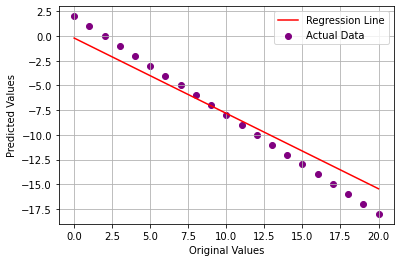

In [208]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

# **Changing hyperparameters**

In [215]:
# beta1 to 0.8, bta2 to 0.8, itrs to 10
trial = Adam(X, Y, 0.09, 10**-8, 0.8, 0.8, 10)

In [216]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.8191129279159277 -0.842357568801612


In [217]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.933032273081304

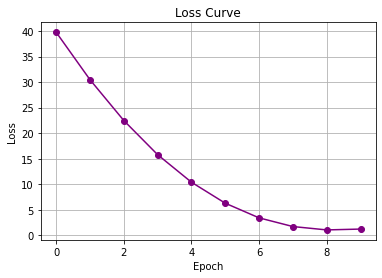

In [218]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


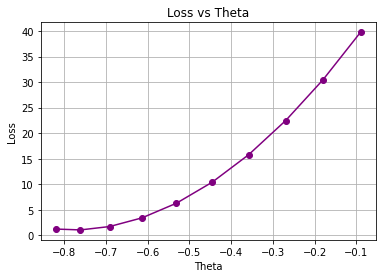


********************** For Theta_1 **********************


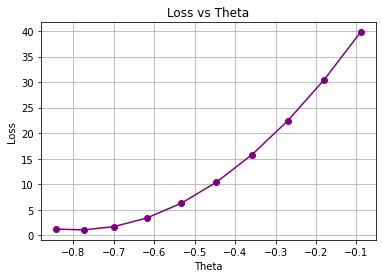

In [219]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

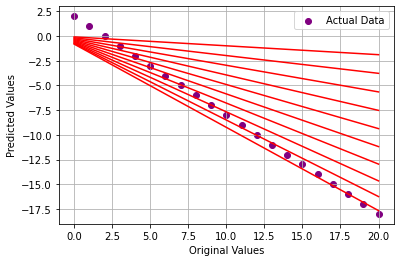

In [220]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

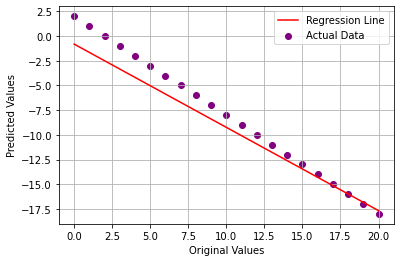

In [221]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [308]:
# alpha to 0.01, beta1 and beta2 to 0.999, itrs to 80
trial = Adam(X, Y, 0.01, 10**-8, 0.999, 0.999, 80)

In [309]:
theta_0, theta_1 = trial[0:2]
print(theta_0, theta_1)

-0.7648659240565558 -0.7732106868137409


In [310]:
Y_pred_final = trial[4][-1]
R2_score(Y, Y_pred_final)

0.941830735892294

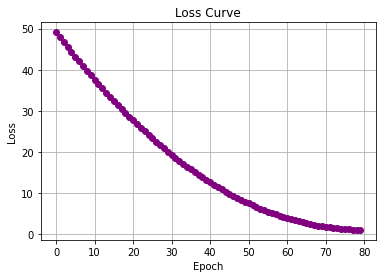

In [311]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

********************** For Theta_0 **********************


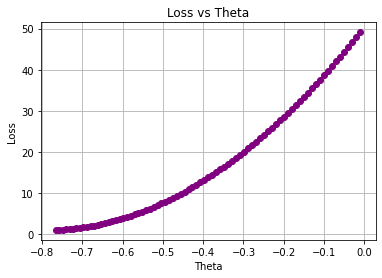


********************** For Theta_1 **********************


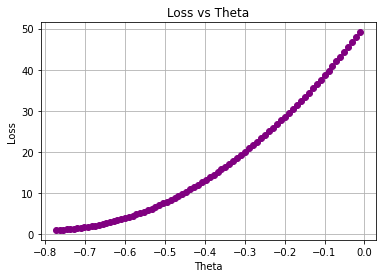

In [312]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]
print("********************** For Theta_0 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_0)
print()
print("********************** For Theta_1 **********************")
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

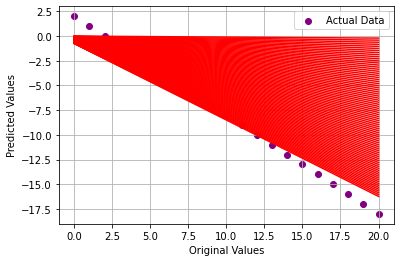

In [313]:
hypothesis_outputs = trial[4]
plot_all_regressions(X, Y, hypothesis_outputs)

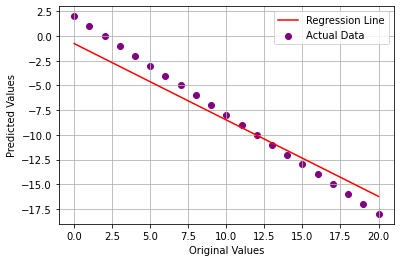

In [314]:
hypothesis_outputs = trial[4]
plot_best_regression(X, Y, hypothesis_outputs)

<hr>

# **Comparing Algorithms**

In [318]:
com1 = Adagrad(X,Y,0.09,10**-8,40)
com2 = RMSProb(X,Y,0.09,10**-8,0.9,40)
com3 = Adam(X,Y,0.09,10**-8,0.9,0.99,40)

In [326]:
# comparing R2 Scores

print('Adagrad Score:', round(R2_score(Y,com1[4][-1]),3))
print('RMSProb Score:', round(R2_score(Y,com2[4][-1]),3))
print('Adam Score:', round(R2_score(Y,com3[4][-1]),3))

Adagrad Score: 0.895
RMSProb Score: 0.987
Adam Score: 0.945


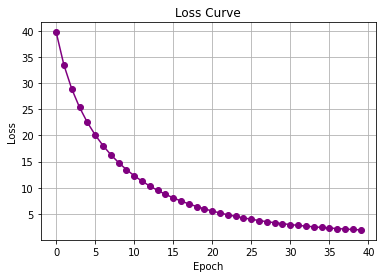

Adagrad loss curve None

***************************************************



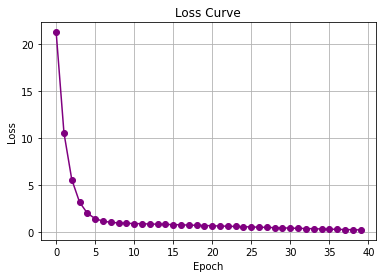

RMSProb loss curve None

***************************************************



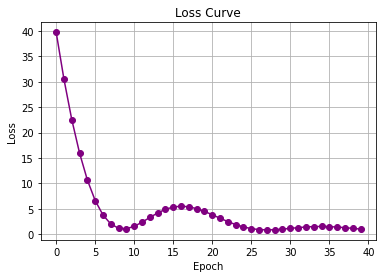

Adam loss curve None


In [325]:
# comparing loss curves

print('Adagrad loss curve', plot_loss_curve(com1[5]))
print('\n***************************************************\n')
print('RMSProb loss curve', plot_loss_curve(com2[5]))
print('\n***************************************************\n')
print('Adam loss curve', plot_loss_curve(com3[5]))

* **Adagrad** depends on latest history and gradient squared to achieve adaptive learning rate.
* **RMSProb** depends on latest history and gradient squared with higher weight for the history at higher values of Beta.
* **Adam** depends on adaptive moment relying on gradient and the history on gradient squared with specific different weight for both and it handles the bias for the points at the beginning with knowing time step.

> **RMSProb** is faster than **Adagrad** as it needed less iterations.
>> **Adam** slightly outperforms others because of bias correction towards the end of optimization.

## Congratulations 
![image.png](attachment:image.png)

# **Thanks So Much :)**